In [131]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook

from sklearn.datasets import make_classification, make_circles
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, \
    accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
plt.style.use("ggplot")

import warnings
warnings.filterwarnings("ignore")

In [74]:
def load_data():
    header = ['edible', 'cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
    data = pd.read_csv('agaricus-lepiota.data', header=None, names=header)
    value_map = {
        'edible': {'p': 'poisonous', 'e': 'edible'},
        'bruises?': {'t': 'bruises', 'f': 'no'},
        'cap-surface': {'y': 'scaly', 'g': 'grooves', 'f': 'fibrous', 's': 'smooth'},
        'stalk-color-below-ring': {'b': 'buff', 'o': 'orange', 'p': 'pink', 'g': 'gray', 'n': 'brown', 'e': 'red', 'w': 'white', 'y': 'yellow', 'c': 'cinnamon'},
        'gill-spacing': {'w': 'crowded', 'd': 'distant', 'c': 'close'},
        'veil-color': {'n': 'brown', 'y': 'yellow', 'w': 'white', 'o': 'orange'},
        'veil-type': {'u': 'universal', 'p': 'partial'},
        'cap-shape': {'f': 'flat', 'k': 'knobbed', 's': 'sunken', 'x': 'convex', 'c': 'conical', 'b': 'bell'},
        'odor': {'y': 'fishy', 'l': 'anise', 'm': 'musty', 'n': 'none', 'p': 'pungent', 'a': 'almond', 'c': 'creosote', 's': 'spicy', 'f': 'foul'},
        'ring-type': {'s': 'sheathing', 'z': 'zone', 'e': 'evanescent', 'n': 'none', 'f': 'flaring', 'p': 'pendant', 'c': 'cobwebby', 'l': 'large'},
        'stalk-root': {'u': 'cup', 'b': 'bulbous', 'z': 'rhizomorphs', 'c': 'club', '?': 'missing', 'r': 'rooted', 'e': 'equal'},
        'gill-color': {'w': 'white', 'k': 'black', 'b': 'buff', 'n': 'brown', 'p': 'pink', 'e': 'red', 'y': 'yellow', 'u': 'purple', 'h': 'chocolate', 'g': 'gray', 'o': 'orange', 'r': 'green'},
        'gill-size': {'n': 'narrow', 'b': 'broad'},
        'cap-color': {'b': 'buff', 'c': 'cinnamon', 'u': 'purple', 'e': 'red', 'p': 'pink', 'r': 'green', 'w': 'white', 'y': 'yellow', 'g': 'gray', 'n': 'brown'},
        'stalk-shape': {'e': 'enlarging', 't': 'tapering'},
        'stalk-surface-above-ring': {'f': 'fibrous', 's': 'smooth', 'k': 'silky', 'y': 'scaly'},
        'gill-attachment': {'n': 'notched', 'f': 'free', 'd': 'descending', 'a': 'attached'},
        'ring-number': {'o': 'one', 'n': 'none', 't': 'two'},
        'spore-print-color': {'r': 'green', 'n': 'brown', 'y': 'yellow', 'k': 'black', 'b': 'buff', 'h': 'chocolate', 'o': 'orange', 'u': 'purple', 'w': 'white'},
        'habitat': {'w': 'waste', 'p': 'paths', 'u': 'urban', 'l': 'leaves', 'd': 'woods', 'g': 'grasses', 'm': 'meadows'},
        'stalk-color-above-ring': {'b': 'buff', 'c': 'cinnamon', 'w': 'white', 'e': 'red', 'p': 'pink', 'y': 'yellow', 'g': 'gray', 'o': 'orange', 'n': 'brown'},
        'population': {'a': 'abundant', 'y': 'solitary', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'c': 'clustered'},
        'stalk-surface-below-ring': {'k': 'silky', 'y': 'scaly', 's': 'smooth', 'f': 'fibrous'}
    }
    return data.replace(value_map)


In [77]:
data = load_data()
data

,edible,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,leaves


# EDA

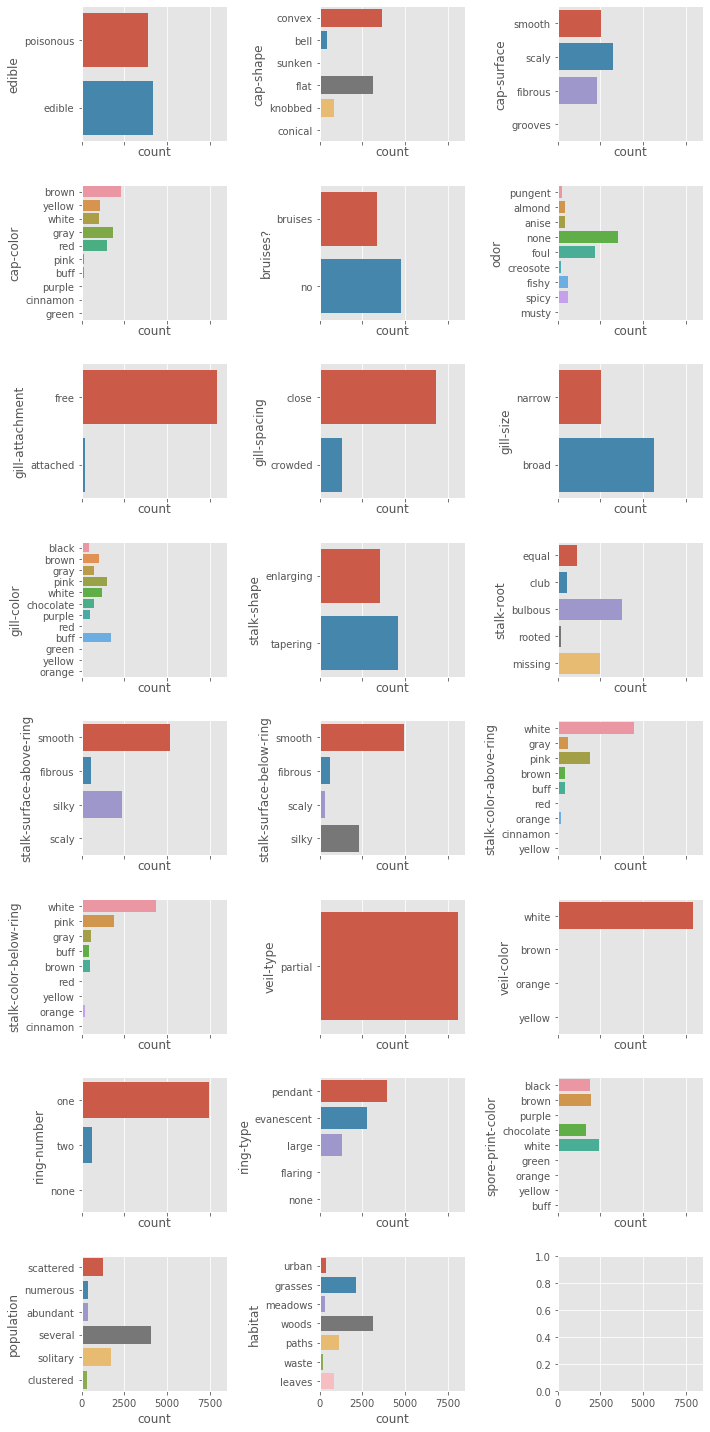

In [116]:
def draw_hist():
    fig, axes =plt.subplots(8, 3, figsize=(10,20), sharex=True)
    axes = axes.flatten()
    for column in zip(data.columns, axes):
        sns.countplot(y=column[0], data=data, ax=column[1])
    plt.tight_layout()  
    plt.show()
    
draw_hist()

edible - целевая переменная, сбалансированый бинарный признак

bruises, gill-attachment, gill-spacing, gill-size, stalk-shape - бинарные признаки

odor - имеет вариант 'none', наверное стоит переделать его в null

veil-type - можно выкинуть

ring-number - можно преобразовать в число

ring-type - имеет вариант none







In [137]:
# binary = ['edible', 'bruises?', 'gill-attachment', 'gill-spacing', 'gill-size', 'stalk-shape']
ohe = OneHotEncoder()
d = ohe.fit_transform(data)


scipy.sparse.csr.csr_matrix